# SVR for Load Forecasting


## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.arrays import categorical
from pandas.core.arrays.categorical import Categorical
from ipywidgets.widgets.widget_controller import Axis

## Loading the Dataset using Pandas

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)



/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
# data (as pandas dataframes)
df = individual_household_electric_power_consumption.data.features
df_Target = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)

{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
null1 = df.isnull().sum()
print(null1)

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_covtype

In [ ]:
df1=df.drop(['Time','Date'], axis=1)
df1.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
a = df['Global_active_power']
b = df['Global_reactive_power']
c = df['Voltage']
d= df['Global_intensity']
e = df['Sub_metering_1']
f = df['Sub_metering_2']
g = df['Sub_metering_3']

for i in range(2075259):
  if a[i] =='?':
    a[i]= 1
for i in range(2075259):
  if b[i] =='?':
    b[i]= 1
for i in range(2075259):
  if c[i] =='?':
    c[i]= 1

for i in range(2075259):
  if d[i] =='?':
    d[i]= 1

for i in range(2075259):
  if e[i] =='?':
    e[i]= 1
for i in range(2075259):
  if f[i] =='?':
    f[i]= 1

for i in range(2075259):
  if g[i] =='?':
    g[i]= 1


#replacing in data
df1['Global_active_power']=a
df1['Global_reactive_power']=b
df1['Voltage']=c
df1['Global_intensity']=d
df1['Sub_metering_1']=e
df1['Sub_metering_2']=f
df1['Sub_metering_3']=g

Streaming output truncated to the last 5000 lines.
<ipython-input-9-5c20d9c02273>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f[i]= 1
<ipython-input-9-5c20d9c02273>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f[i]= 1
<ipython-input-9-5c20d9c02273>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f[i]= 1
<ipython-input-9-5c20d9c02273>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
df1['Global_active_power'].astype(float)
df1['Global_reactive_power'].astype(float)
df1['Voltage'].astype(float)
df1['Global_intensity'].astype(float)
df1['Sub_metering_1'].astype(float)
df1['Sub_metering_2'].astype(float)
df1['Sub_metering_3'].astype(float)

0          17.0
1          16.0
2          17.0
3          17.0
4          17.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Name: Sub_metering_3, Length: 2075259, dtype: float64

In [ ]:
null1 = df1.isnull().sum()
print(null1)

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [ ]:
df1['Sub_metering_3'] = df1['Sub_metering_3'].fillna(0)

In [ ]:
null1 = df1.isnull().sum()
print(null1)

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [ ]:
# https://drive.google.com/file/d/1RI2DPuB-7dSrNFJcEJs4215PDr64by8d/view?usp=sharing
!pip install --upgrade --no-cache-dir gdown
!gdown 1RI2DPuB-7dSrNFJcEJs4215PDr64by8d

In [ ]:
df1.to_csv('data.csv')

## Data Spliting and Standardization

In [2]:
# https://drive.google.com/file/d/1BqBm-QmPx_dyiBnzMM-DUucvYyuo4lI5/view?usp=sharing
!pip install --upgrade --no-cache-dir gdown
!gdown 1BqBm-QmPx_dyiBnzMM-DUucvYyuo4lI5

Downloading...
From: https://drive.google.com/uc?id=1BqBm-QmPx_dyiBnzMM-DUucvYyuo4lI5
To: /content/data1.csv
100% 14.2M/14.2M [00:00<00:00, 65.1MB/s]


In [3]:
Data=pd.read_csv("/content/data1.csv")
Data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0,1,17
1,5.360,0.436,233.63,23.0,0,1,16
2,5.374,0.498,233.29,23.0,0,2,17
3,5.388,0.502,233.74,23.0,0,1,17
4,3.666,0.528,235.68,15.8,0,1,17


In [4]:
data = Data[0:150000]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#rbf when c=1
y = data['Voltage']
X = data.drop(['Voltage'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
scalar=StandardScaler()
scalar.fit(X_train)
X_train_scalar=scalar.transform(X_train)
X_test_scalar=scalar.transform(X_test)
print("Xtrain:", X_train_scalar.shape)
print("Xtest:", X_test_scalar.shape)
print("ytrain:", y_train.shape)
print("ytest:",y_test.shape)

Xtrain: (120000, 6)
Xtest: (30000, 6)
ytrain: (120000,)
ytest: (30000,)


## Model Development


*   Model is developed after trying different combinations of Hyperparameters and kernels
* Best Hyperparameters are C= 1, degree= 1 and Gamma=0.1
* Best Kernel is Radial Basis Function




In [6]:
# Fitting SVR to the Training set with RBF kernel
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', degree = 1 ,gamma=0.1)
svr.fit(X_train_scalar,y_train)

SVR(degree=1, gamma=0.1)

## Model Evalution
* Training and Testing MAPE (Mean Absolute Percentage Error)

In [7]:
#training metrics when
y_train_pred=svr.predict(X_train_scalar)
def mean_absolute_percentage_error(y_train, y_train_pred):
    return np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape = mean_absolute_percentage_error(y_train, y_train_pred)
print("Mean Absolute Percentage Error of Training Set is:",mape)

Mean Absolute Percentage Error of Training Set is: 2.4842191932585975


In [8]:
#testing metrics when
y_pred_test=svr.predict(X_test_scalar)
def mean_absolute_percentage_error(y_test, y_pred_test):
    return np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("Mean Absolute Percentage Error of Testing Set is",mape_test)

Mean Absolute Percentage Error of Testing Set is 0.7412437740864859


In [10]:
import math

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = math.sqrt(train_mse)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = math.sqrt(test_mse)

print(f'Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MSE: {test_mse}, Test RMSE: {test_rmse}')

Train MSE: 9.33769352755235, Train RMSE: 3.055763984268476
Test MSE: 5.296041433630696, Test RMSE: 2.301312980372443


In [11]:
from sklearn.metrics import mean_absolute_percentage_error
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)

In [12]:
print('Train:')
print(f'MSE: {train_mse},   RMSE: {train_rmse},  MAPE: {train_mape}')
print('Test:')
print(f'MSE: {test_mse},    RMSE: {test_rmse},   MAPE: {test_mape}')


Train:
MSE: 9.33769352755235,   RMSE: 3.055763984268476,  MAPE: 0.024842191932585977
Test:
MSE: 5.296041433630696,    RMSE: 2.301312980372443,   MAPE: 0.007412437740864859


Text(0.5, 1.0, 'Predicted Test data using LSTM')

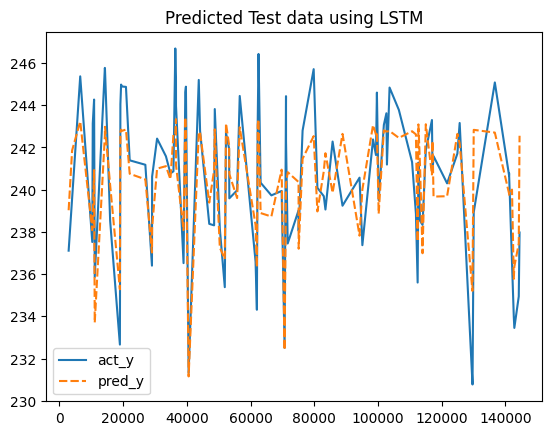

In [13]:
predict=pd.DataFrame({'act_y':y_test[0:100], 'pred_y':y_pred_test[0:100]})
sns.lineplot(predict)

# displaying the title
plt.title("Predicted Test data using LSTM")

